### Information

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Flipping a coin (non biased) 100 times
rand_coins = np.random.binomial(1, 0.5, 100)

rand_coins

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

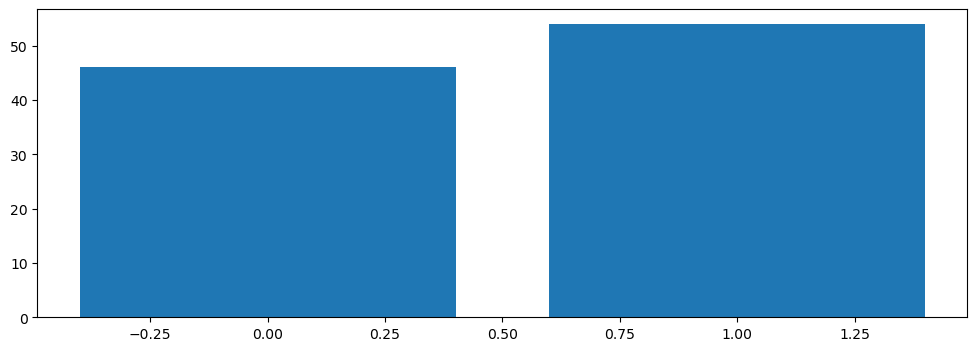

In [26]:
# Create an empty plot

fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);



In [23]:
x, counts

(array([0, 1]), array([46, 54]))

### Bernoulli Distribution

In [37]:
# The Bernoulli distribution is just the binomial with the first parameter as 1
# Remember binomial can be used for multiple coins as such by setting the first parameter

def bernoulli(p, size=None):
    return np.random.binomial(1, p, size)


In [36]:
bernoulli(0.5)

0

In [38]:
# Flipping an unfair coin

rand_coins = bernoulli(0.7, 100)

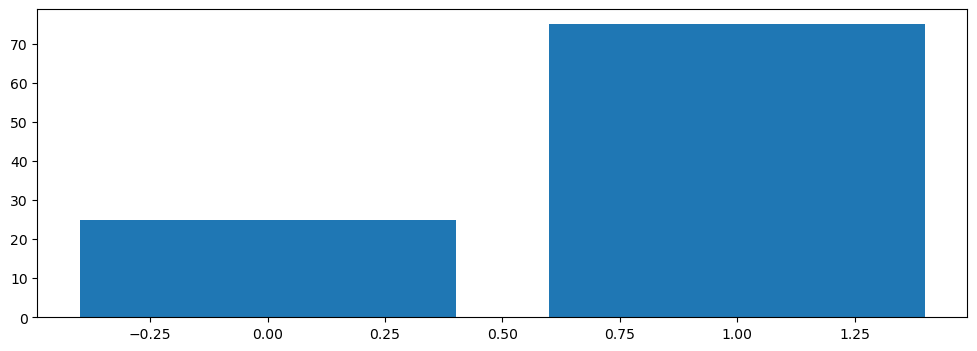

In [39]:
# Create a plot for the bernoulli

fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);